<div style="color:white; background-color:#263b52; text-align:center; padding: 25px 0;">
    <div style="font-size:34px; font-family:calibri; font-weight:bold;">
        ML Zoomcamp 2025
    </div>
    <div style="font-size:22px; font-family:verdana; line-height: 1.5; margin-top:10px;">
        Homework 2: Regression - Car fuel efficiency
    </div>
</div>

<div style="margin-top:20px; overflow:auto;">
  <div style="float:left; width:50%; text-align:left; font-family:verdana; font-size:16px; color:#263b52;">
      <p style="margin:4px 0;"><b>Author:</b> CGD</p>
      <p style="margin:4px 0;"><b>GitHub:</b> <a href="https://github.com/CGD2401" target="_blank">CGD2401</a></p>
      <p style="margin:4px 0;"><b>Date:</b> October 2025</p>
  </div>

  <div style="float:right; width:50%; text-align:right; font-family:verdana; font-size:16px; color:#263b52;">
      <p style="margin:4px 0;">Notebook prepared for</p>
      <p style="margin:4px 0;"><b>Machine Learning Zoomcamp</b></p>
      <p style="margin:4px 0;">Homework covering Q1–Q6</p>
  </div>
</div>

<div style="width:100%; clear:both;"></div>

<hr style="border:3px solid #7ba5b0; margin-top:25px;"/>


## Objective
Build a **linear regression** model to predict `fuel_efficiency_mpg` using the following columns:

- `engine_displacement`
- `horsepower`
- `vehicle_weight`
- `model_year`
- `fuel_efficiency_mpg` *(target)*

**Metric:** RMSE  
**Splits:** 60% / 20% / 20% (train/val/test)  
**Base seed:** 42


## 1. Importing Libraries
In this section, we load the essential Python libraries required for the homework.  
- **NumPy** for numerical operations  
- **Pandas** for data manipulation and analysis  
- **Matplotlib** and **Seaborn** for data visualization 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline


## 2. Data loading and column selection

In this section we download and load the Car Fuel Efficiency dataset into a Pandas DataFrame. The dataset is downloaded from GitHub (official course URL).

In [5]:
URL = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
use_cols = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']
df = pd.read_csv(URL, usecols=use_cols)
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [6]:
print("Shape:", df.shape)

Shape: (9704, 5)


## 3. Exploratory Data Analysis (EDA)

In this section we perform basic exploration to understand the dataset’s structure and quality.
- Missing values per column
- Descriptive statistics
- Histogram + skewness of `fuel_efficiency_mpg` (long tail check)

In [8]:
# Missing values and describe
display(df.isna().sum())
display(df.describe())

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


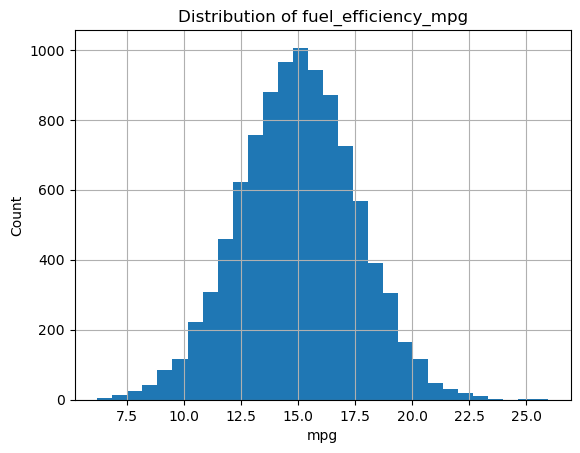

Skew: -0.012062219273507958


In [9]:
# Histogram and skew
plt.figure()
df['fuel_efficiency_mpg'].hist(bins=30)
plt.title('Distribution of fuel_efficiency_mpg')
plt.xlabel('mpg'); plt.ylabel('Count')
plt.show()

print("Skew:", df['fuel_efficiency_mpg'].skew())

## 4. Homework Questions

#### **Q1**: Missing values

In [12]:
missing = df.isna().sum()
q1_column = missing[missing>0].sort_values(ascending=False).index.tolist()[0]
print("Q1 (column with NAs):", q1_column)

Q1 (column with NAs): horsepower


#### **Q2**: Median for horse power 

In [13]:
q2_median = df['horsepower'].median()
print("Q2 (median horsepower):", int(round(q2_median)))


Q2 (median horsepower): 149



## Preparation and split
- Shuffle with `seed=42`
- Split 60/20/20 (train/val/test)

In [16]:
import numpy as np
import pandas as pd

num_cols = ['engine_displacement','horsepower','vehicle_weight','model_year']
target = 'fuel_efficiency_mpg'

def add_bias(X):
    ones = np.ones(X.shape[0])
    return np.column_stack([ones, X])

def train_linear_regression(X, y, r=0.0):
    """Train linear regression with optional L2 (ridge) using the normal equation.
    We do not regularize the bias term.
    """
    Xb = add_bias(X)
    reg = r * np.eye(Xb.shape[1])
    reg[0, 0] = 0.0  # do not regularize bias (bias = first column of ones)
    XTX = Xb.T @ Xb
    XTy = Xb.T @ y
    w = np.linalg.solve(XTX + reg, XTy)
    return w

def predict_linear_regression(X, w):
    return add_bias(X) @ w

def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred) ** 2))

def shuffle_split(df_in, seed, train_frac=0.6, val_frac=0.2, test_frac=0.2):
    n = len(df_in)
    idx = np.arange(n)
    rng = np.random.RandomState(seed)
    rng.shuffle(idx)
    n_train = int(n * train_frac)
    n_val = int(n * val_frac)
    d = df_in.iloc[idx].reset_index(drop=True)
    return (
        d.iloc[:n_train].reset_index(drop=True),
        d.iloc[n_train:n_train+n_val].reset_index(drop=True),
        d.iloc[n_train+n_val:].reset_index(drop=True),
    )

def prepare_X(df_part, fill_values=None):
    X = df_part[num_cols].copy()
    if fill_values is None:
        return X.fillna(0).values.astype(float)
    else:
        return X.fillna(fill_values).values.astype(float)


In [17]:

df_train, df_val, df_test = shuffle_split(df, seed=42)
len(df_train), len(df_val), len(df_test)


(5822, 1940, 1942)


#### **Q3**: Filling NAs

We train two models and compare RMSE on validation.  

In [18]:

y_train = df_train[target].values
y_val = df_val[target].values

# Fill=0
w0 = train_linear_regression(prepare_X(df_train, None), y_train, r=0.0)
rmse_val_0 = rmse(y_val, predict_linear_regression(prepare_X(df_val, None), w0))

# Fill=mean (computed on train only)
means_train = df_train[num_cols].mean()
w_mean = train_linear_regression(prepare_X(df_train, means_train), y_train, r=0.0)
rmse_val_mean = rmse(y_val, predict_linear_regression(prepare_X(df_val, means_train), w_mean))

print("RMSE val (fill 0):   ", round(rmse_val_0, 2))
print("RMSE val (fill mean):", round(rmse_val_mean, 2))

if round(rmse_val_0,2) < round(rmse_val_mean,2):
    print("Q3: With 0")
elif round(rmse_val_mean,2) < round(rmse_val_0,2):
    print("Q3: With mean")
else:
    print("Q3: Both are equally good")


RMSE val (fill 0):    0.52
RMSE val (fill mean): 0.46
Q3: With mean



#### **Q4** — Best regularization -  (Ridge) with 0-imputation

 We try:`r in [0, 0.01, 0.1, 1, 5, 10, 100]`.  



RMSE(val) by r: [(0, 0.52), (0.01, 0.52), (0.1, 0.52), (1, 0.52), (5, 0.52), (10, 0.52), (100, 0.52)]
Q4 (best r): 0


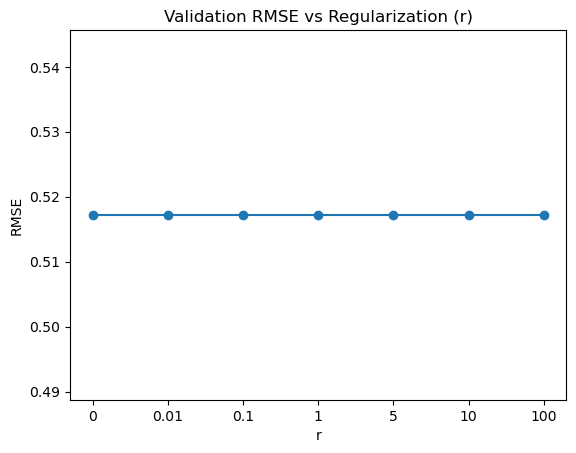

In [19]:

r_list = [0, 0.01, 0.1, 1, 5, 10, 100]
scores = {}
for r in r_list:
    w_r = train_linear_regression(prepare_X(df_train, None), y_train, r=r)
    scores[r] = rmse(y_val, predict_linear_regression(prepare_X(df_val, None), w_r))

pairs = [(r, round(scores[r],2)) for r in r_list]
best_r = min(scores.keys(), key=lambda r: (round(scores[r],2), r))
print("RMSE(val) by r:", pairs)
print("Q4 (best r):", best_r)

# Bonus plot: RMSE vs r
plt.figure()
plt.plot([str(r) for r in r_list], [round(scores[r],4) for r in r_list], marker='o')
plt.title("Validation RMSE vs Regularization (r)")
plt.xlabel("r"); plt.ylabel("RMSE")
plt.show()



#### **Q5** — RMSE Standard Deviation
Seeds `0..9`, 0-imputation, no regularization. Compute std of validation RMSE.  
**Rounding:** 3 decimals.


In [20]:

seeds = list(range(10))
val_rmses = []
for s in seeds:
    dtr, dv, dte = shuffle_split(df, seed=s)
    w_s = train_linear_regression(prepare_X(dtr, None), dtr[target].values, r=0.0)
    y_pred_s = predict_linear_regression(prepare_X(dv, None), w_s)
    val_rmses.append(rmse(dv[target].values, y_pred_s))

std_scores = float(np.std(val_rmses))
print("Validation RMSE by seed:", [round(x,3) for x in val_rmses])
print("Q5 std:", round(std_scores,3))


Validation RMSE by seed: [0.521, 0.522, 0.523, 0.516, 0.511, 0.529, 0.532, 0.51, 0.515, 0.513]
Q5 std: 0.007



#### **Q6** —  Evaluation on test
`seed=9`, combine train+val, 0-imputation, `r=0.001`. Report test RMSE.  
Pick the closest option.


Q6 Test RMSE: 0.515


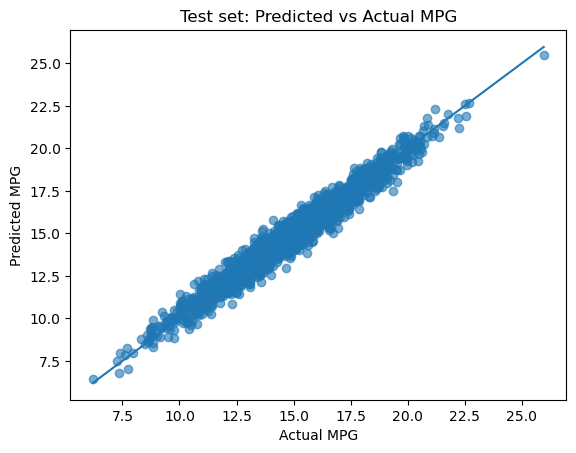

In [21]:

dtr, dv, dte = shuffle_split(df, seed=9)
df_full = pd.concat([dtr, dv]).reset_index(drop=True)
w_final = train_linear_regression(prepare_X(df_full, None), df_full[target].values, r=0.001)
rmse_test = rmse(dte[target].values, predict_linear_regression(prepare_X(dte, None), w_final))
print("Q6 Test RMSE:", round(rmse_test,3))

# Bonus plot: Predicted vs Actual on test
y_test = dte[target].values
y_pred_test = predict_linear_regression(prepare_X(dte, None), w_final)

plt.figure()
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.title("Test set: Predicted vs Actual MPG")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
lims = [min(y_test.min(), y_pred_test.min()), max(y_test.max(), y_pred_test.max())]
plt.plot(lims, lims)
plt.show()
